In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from shutil import rmtree
from pathlib import Path
from tqdm import tqdm
import pandas as pd
import numpy as np
import json

import matplotlib.patches as mpatches
from matplotlib.ticker import MaxNLocator



In [3]:

## test group 1
# test1 local provider one node same parameters, 64 threads
test1 = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/save_runs/dft-md-23Sep16-062515-d68b07')
# test11 = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/save_runs/dft-md-23Sep16-062515-d68b07')
# test2 one node local provider with 4threads in sampling
test2 = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/save_runs/dft-md-23Sep18-112842-d68b07')

## test group 2, new parameters, max threads vs 8 threads
test1 = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/20230920_204954/dft-md-23Sep20-125003-d91b7e') # 8 threads
test2_1 = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/save_runs/20230920_205433/dft-md-23Sep20-125452-d987e1') # max threads

test2_lf = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/save_runs/20230921_170103/dft-md-23Sep21-090112-ec9722') # 8 threads, long task first
test2_3 = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/20230921_205721/dft-md-23Sep21-125731-202c93') # max threads, same task sequence

test3 = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/20230922_012314/dft-md-23Sep21-172324-085ef3') 

## test group 3, runtime parameters
# 4 threads 14 qc workers
test1 = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/20231007_154222/dft-md-23Oct07-074231-0c9c0c')

In [4]:
### Load the data
## for molecule design
task_type = ['inference-results', 'training-results', 'simulation-results']
task_color = {'run_simulation': 'blue', 'retrain_mpnn': 'red', 'evaluate_mpnn': 'yellow'}
def load_results(path: Path, task_type) -> pd.DataFrame:
    """Load the results from a run.
    
    Args:
        path: Path to the run directory.
    Returns:
        Dataframe of all results
    """
    
    # Loop over inference, training, and simulation results
    output = []
    for task in task_type:
        # Load the results
        data = path / f'{task}.json'
        assert data.is_file(), f'Could not find {data}'
        results = pd.read_json(data, lines=True)
        output.append(results)
    output = pd.concat(output)
    return output

def get_wct(results:pd.DataFrame) -> int:
    """get whole completion time.
    
    Args: 
        results dataframe of the workflow
    Returns:
        workflow completion time from task created to task results received.
    """
    start_time = results['time_created'].min()
    end_time = results['time_result_received'].max()
    return int(end_time - start_time)

In [5]:
def time_line_graph(results: pd.DataFrame, task_color: dict):
    """plot time_line_graph of each task.

    Args:
        results (pd.DataFrame): results object of the workflow from colmema.
        task_color (dict): color of each task.  
    """ 
    #### time line of task
    # rows = len(results)
    fig,ax = plt.subplots(figsize=(20, 12))
    task_timeline = results
    task_timeline.sort_values('time_compute_started', inplace=True, ignore_index=True)
    start_time = task_timeline['time_compute_started'].loc[0]
    wct = get_wct(task_timeline)
    ax.text(0, len(task_timeline)-1, f'  Workflow completion time: {wct}', ha='left', va='center', fontsize=30, color='red')
    handles = []
    labels = []
    for index, row in task_timeline.iterrows():
        print(f"{row['method']}: {row['time_compute_started']}: {row['time_running']}")
        # method = str(row['method'])+str(index)+"  time:  "+str(row['time_running'])
        method = str()
        time = row['time_running']
        bar = ax.barh(index, time, left=row['time_compute_started'] - start_time, color=task_color[row['method']])
        # ax.text(row['time_compute_started'] - start_time, index, method, ha='left', va='center',fontsize=6)
    
    ax.set_xlabel('Time (s)',fontsize=32)
    ax.set_ylabel('Task',fontsize=32)
    ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
    handles = []
    labels = []
    for task, color in task_color.items():
        patch = mpatches.Patch(color=color, label=task)
        handles.append(patch)
        labels.append(task)
    ax.legend(handles, labels, loc='lower right', prop={'size': 30})
    # ax.margins(y=0.1)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.tight_layout()
    plt.grid()
    plt.show()

train: 1695286883.156341: 186.79636343405582
train: 1695286883.282726: 183.89907864900306
train: 1695286883.287668: 213.81825742602814
train: 1695286883.623223: 211.84734689304605
run_sampling: 1695287067.640351: 2.147360316012054
run_sampling: 1695287069.825319: 2.307219527079723
run_sampling: 1695287070.173999: 2.048660284024663
run_sampling: 1695287072.168705: 2.077754224999807
run_sampling: 1695287072.265172: 2.300262514036149
run_sampling: 1695287074.282889: 2.017923771985806
run_sampling: 1695287074.605046: 2.089737616013735
run_sampling: 1695287076.335872: 2.14647325198166
run_sampling: 1695287076.733438: 2.234669381054118
run_sampling: 1695287078.517389: 2.198153408942744
run_sampling: 1695287079.002134: 2.375348008936271
run_sampling: 1695287080.752499: 2.19111310201697
run_sampling: 1695287081.414197: 2.325870816013775
run_sampling: 1695287082.978717: 2.35473531705793
run_sampling: 1695287083.775077: 2.131232602987438
run_sampling: 1695287085.369688: 2.35625416599214
run_samp

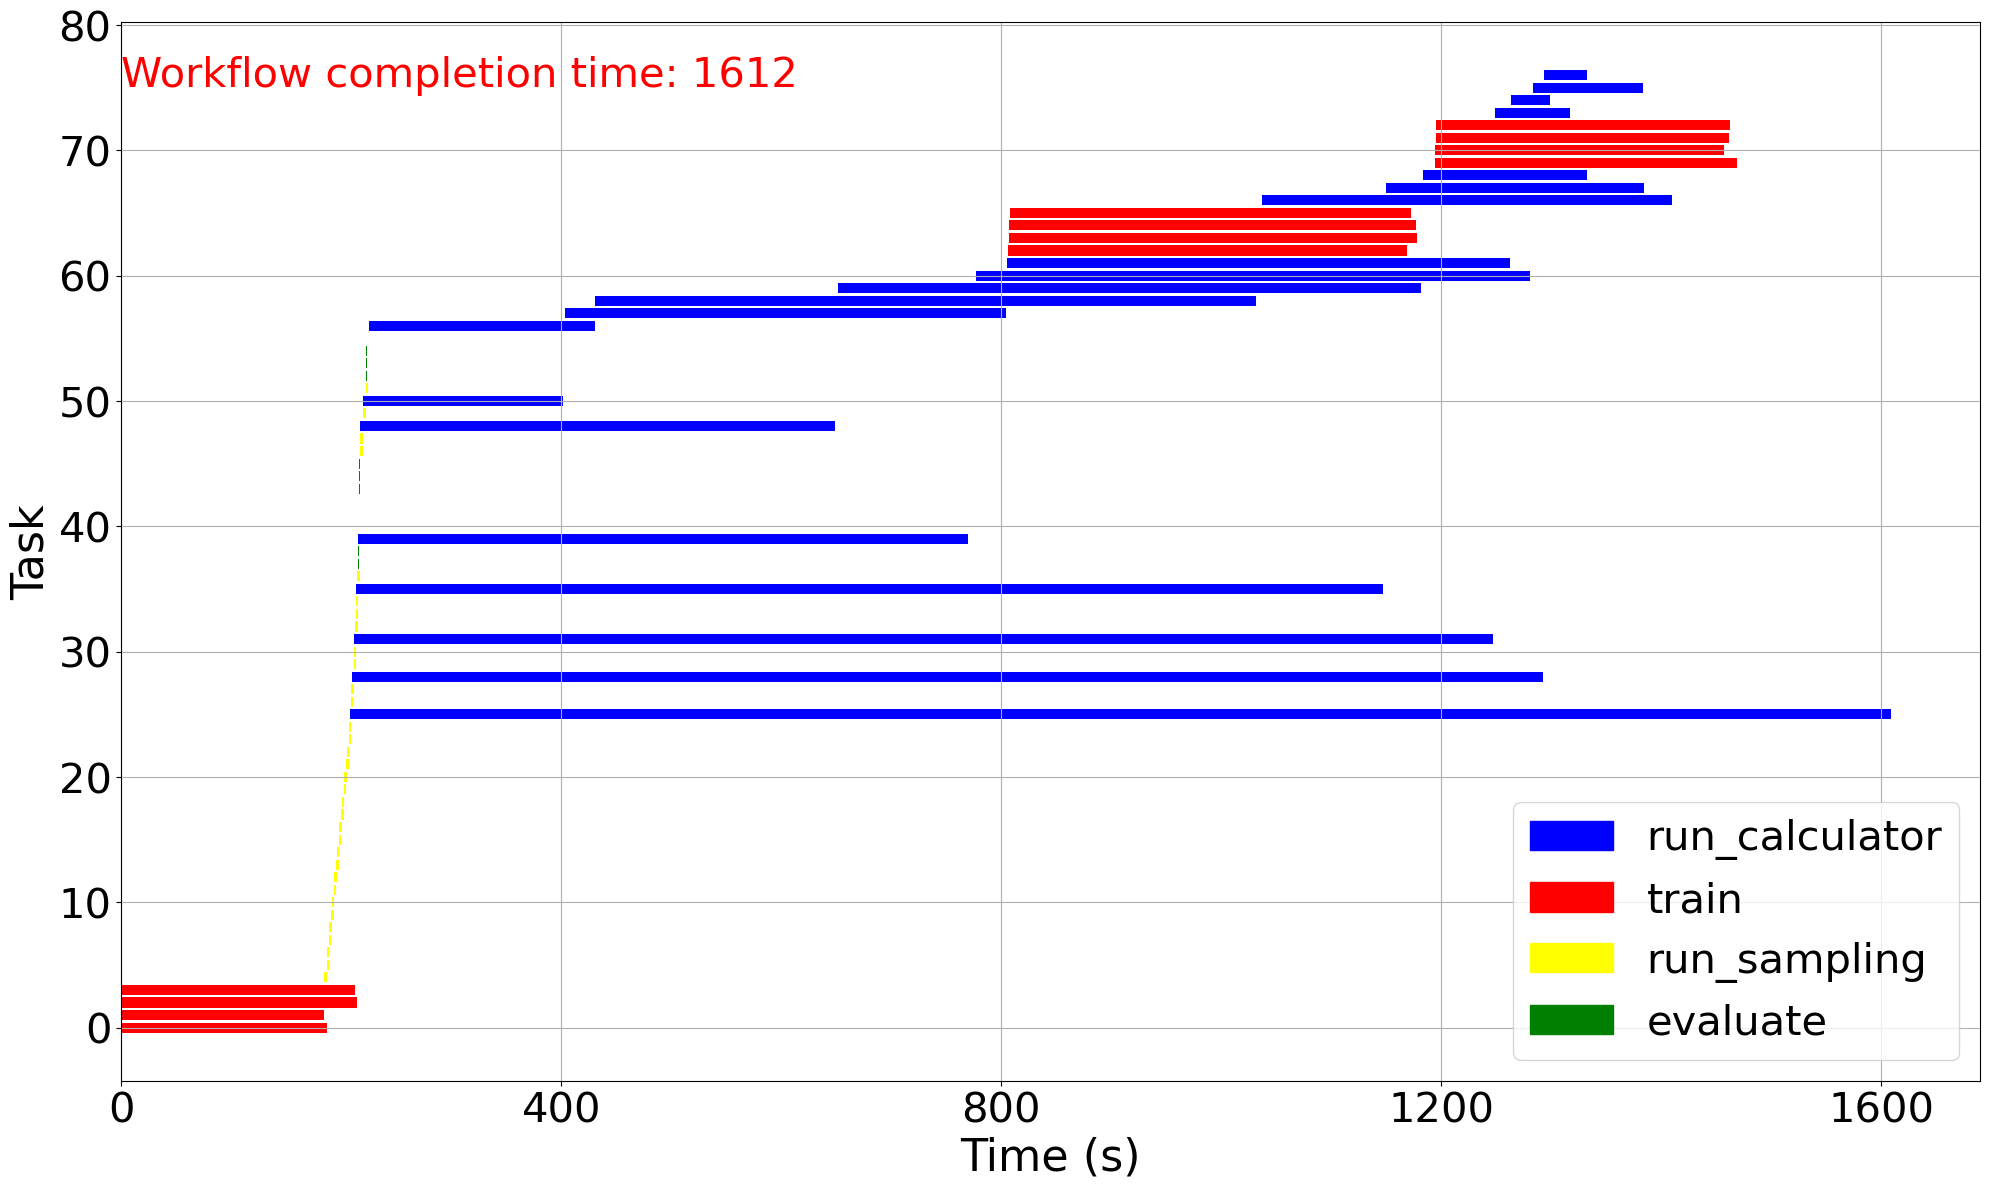

In [6]:
# fine-tuning surrogates, 64 threads
task_type = ['sampling-results', 'training-results', 'simulation-results', 'inference-results']
task_color = {'run_calculator': 'blue', 'train': 'red', 'run_sampling': 'yellow', 'evaluate': 'green'}
results = load_results(test2_lf, task_type=task_type)
time_line_graph(results=results, task_color=task_color)

train: 1695036531.963228: 9.503871736000292
train: 1695036532.00212: 9.373642747057602
train: 1695036532.240705: 9.61582452908624
train: 1695036532.385181: 9.226045848918147
run_sampling: 1695036541.724867: 1.755990487989038
run_sampling: 1695036541.725402: 1.961033044965006
run_sampling: 1695036541.794346: 1.619459579000249
run_sampling: 1695036542.046092: 1.433582003926858
run_sampling: 1695036543.443942: 1.779547867015935
run_sampling: 1695036543.509894: 1.439813044038601
run_sampling: 1695036543.518605: 1.957347396062687
run_sampling: 1695036543.723228: 1.8319531489396461
run_sampling: 1695036544.981618: 1.4775523319840431
run_sampling: 1695036545.256995: 2.674353832029737
run_sampling: 1695036545.514912: 1.9136647100094701
run_sampling: 1695036545.596089: 1.7897932030027732
run_sampling: 1695036546.490718: 1.7258701950777322
run_sampling: 1695036547.424452: 1.9189682879950851
run_sampling: 1695036547.461847: 1.7558801730629052
run_sampling: 1695036547.966402: 2.398503080010414
run

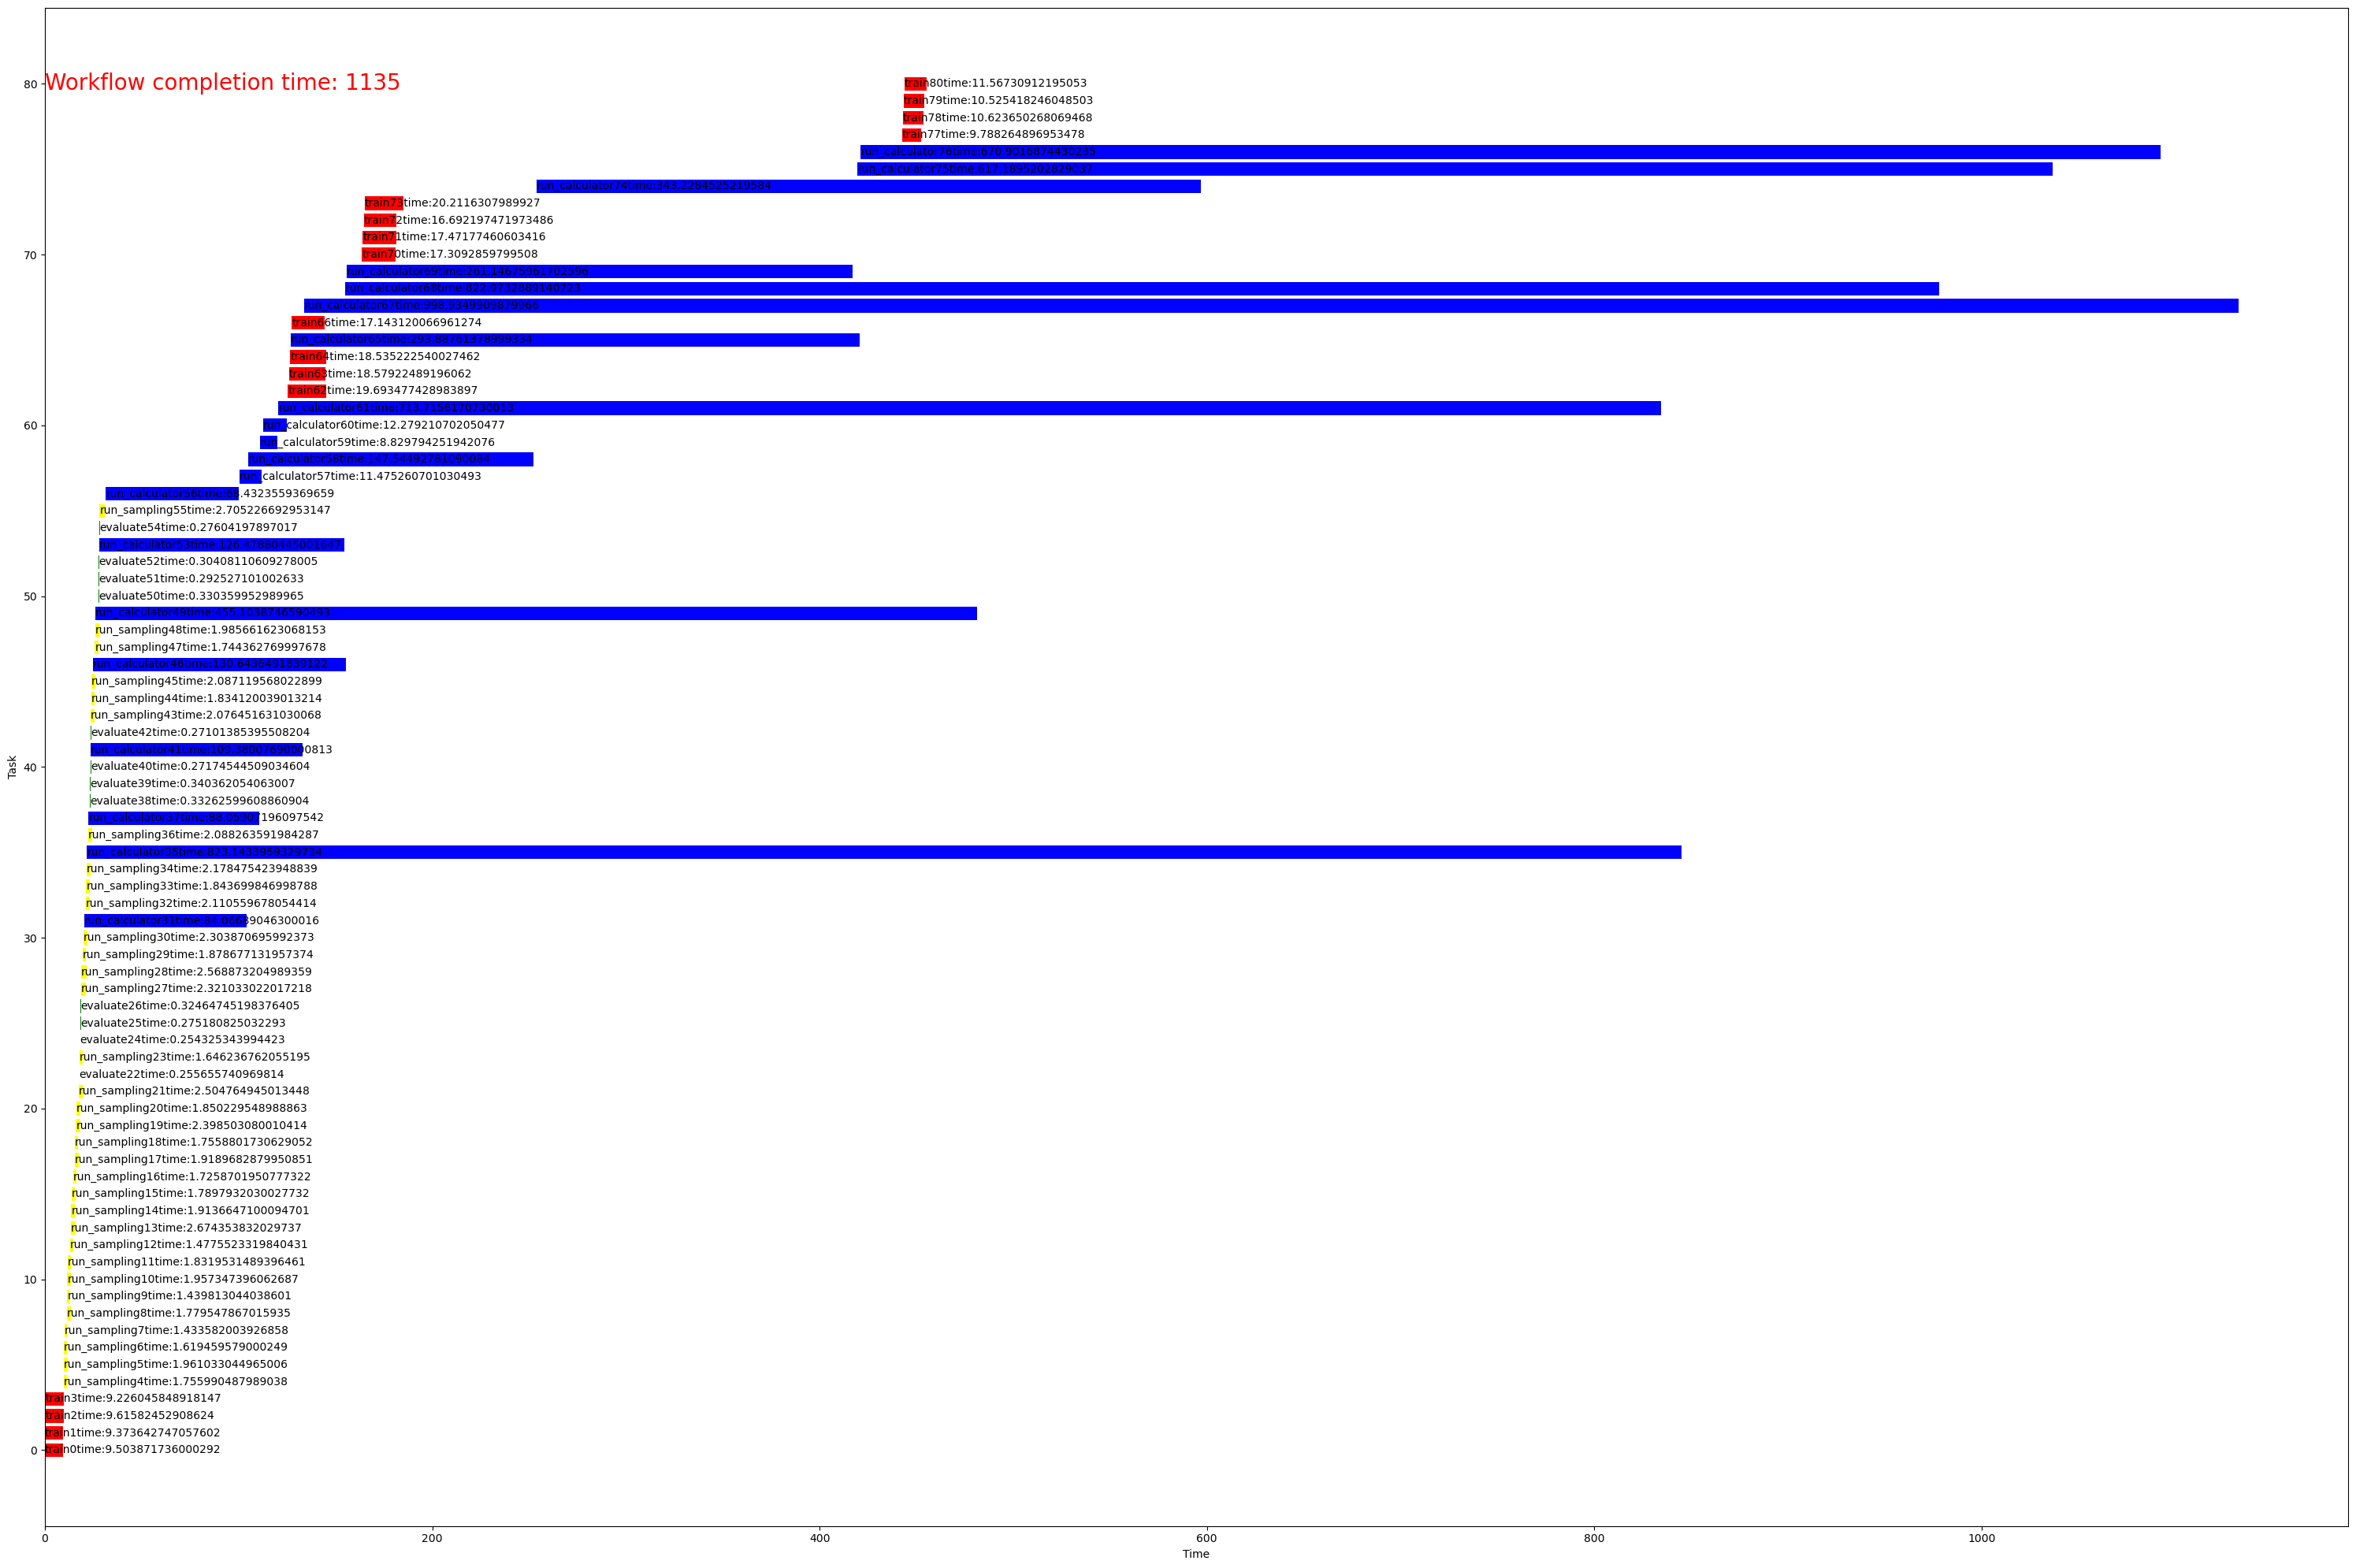

In [11]:
# fine-tuning surrogates 8 threads
task_type = ['sampling-results', 'training-results', 'simulation-results', 'inference-results']
task_color = {'run_calculator': 'blue', 'train': 'red', 'run_sampling': 'yellow', 'evaluate': 'green'}
results = load_results(test2, task_type=task_type)
time_line_graph(results=results, task_color=task_color)

train: 1695214512.864226: 314.54613737401087
train: 1695214512.874277: 329.0091431159526
train: 1695214512.90019: 313.26097548007965
train: 1695214513.381672: 320.85144868306816
run_sampling: 1695214827.054084: 3.866724194027483
run_sampling: 1695214827.908714: 3.8392343299929053
run_sampling: 1695214830.977142: 3.582278348039835
run_sampling: 1695214831.812089: 3.689012047019787
run_sampling: 1695214834.60969: 3.5668017480056733
run_sampling: 1695214834.845586: 3.891459924052469
run_sampling: 1695214835.55954: 4.009580718004145
run_sampling: 1695214838.229013: 3.991379566024989
run_sampling: 1695214838.804975: 4.51324929704424
run_sampling: 1695214839.640108: 4.36237855500076
run_sampling: 1695214842.275059: 3.541047803941183
run_sampling: 1695214842.471412: 4.207898642052896
run_sampling: 1695214843.383121: 4.179023285047151
run_sampling: 1695214844.060905: 4.207629523007199
run_sampling: 1695214845.867699: 3.749527900014072
run_sampling: 1695214846.75624: 4.075138816027902
run_sampl

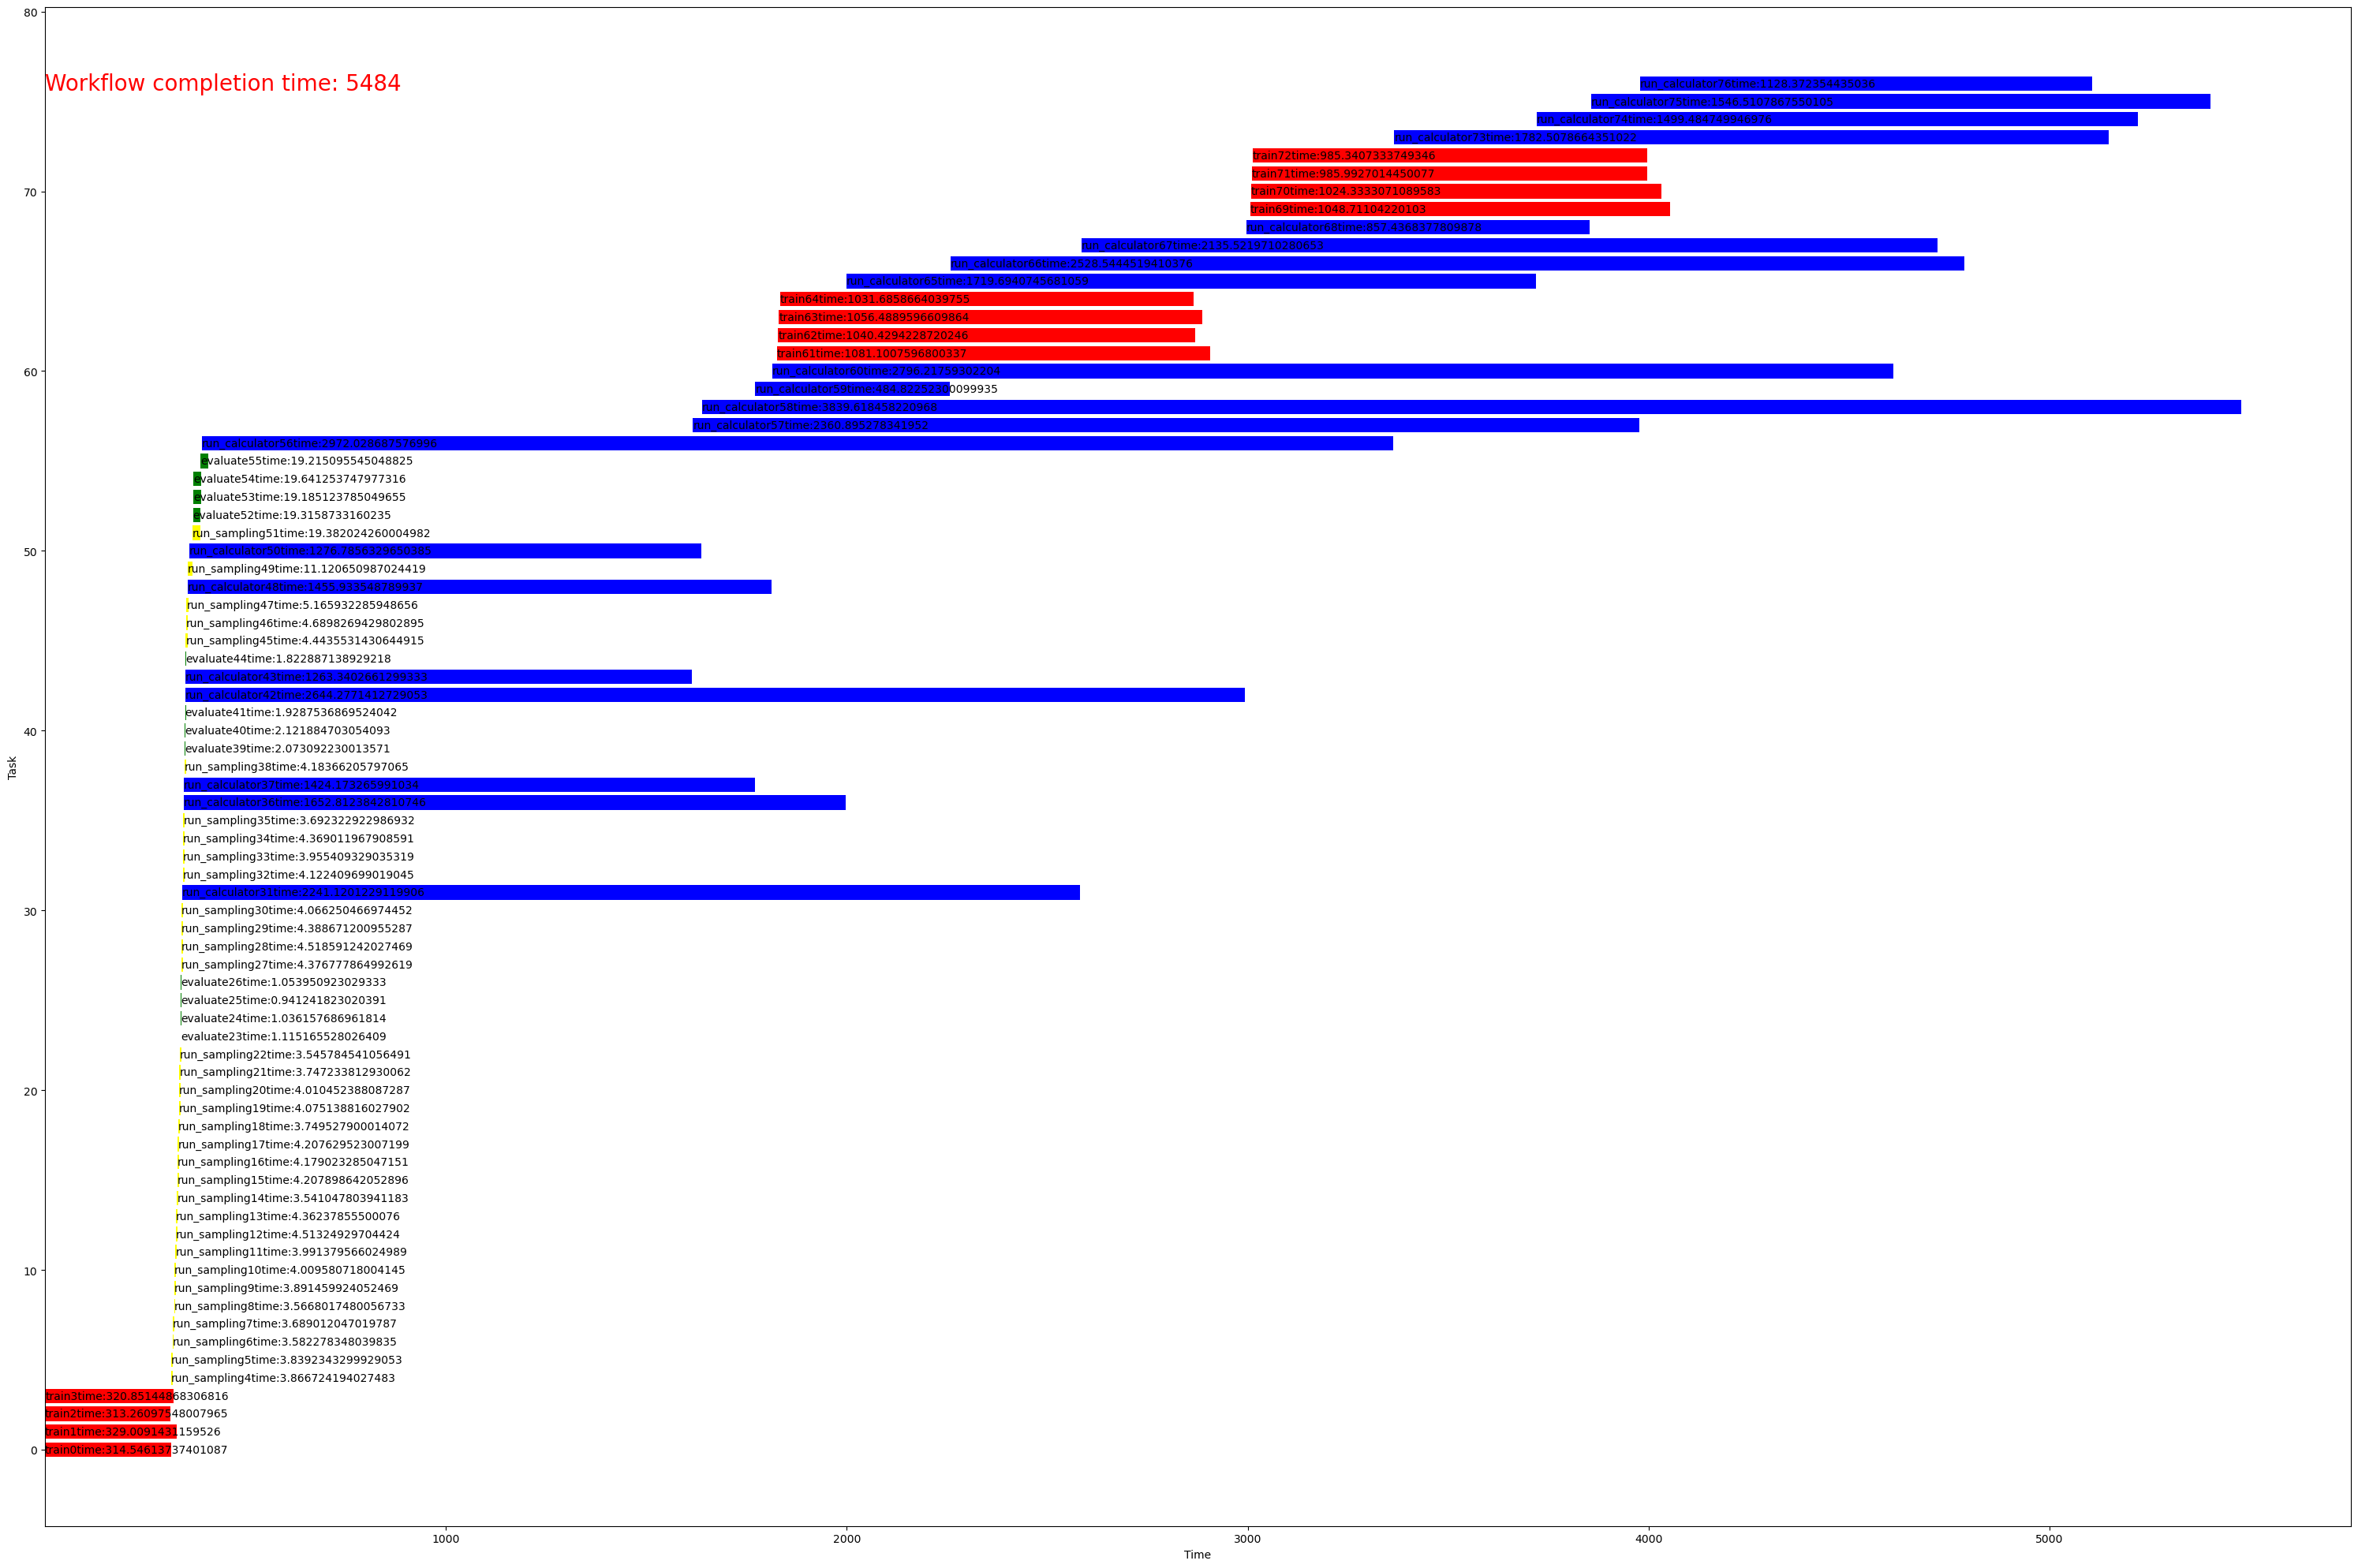

In [12]:
# fine-tuning surrogates, neww parameters max threads
task_type = ['sampling-results', 'training-results', 'simulation-results', 'inference-results']
task_color = {'run_calculator': 'blue', 'train': 'red', 'run_sampling': 'yellow', 'evaluate': 'green'}
results = load_results(test2_2, task_type=task_type)
time_line_graph(results=results, task_color=task_color)

train: 1695214213.804326: 183.95196364505682
train: 1695214213.863355: 205.8495090219658
train: 1695214214.212592: 205.28473542595748
train: 1695214214.326809: 182.64468331402168
run_sampling: 1695214397.43003: 2.15012092993129
run_sampling: 1695214397.972373: 1.9783671180484812
run_sampling: 1695214399.627307: 2.099069559015333
run_sampling: 1695214399.987072: 2.10431881097611
run_sampling: 1695214401.771302: 2.273646553978324
run_sampling: 1695214402.12965: 2.072643283987418
run_sampling: 1695214404.087804: 1.978183672996237
run_sampling: 1695214404.237723: 2.107747839996591
run_sampling: 1695214406.112688: 2.046761510078795
run_sampling: 1695214406.38151: 2.037673217011615
run_sampling: 1695214408.202951: 2.206905347062275
run_sampling: 1695214408.4585: 2.232691521989181
run_sampling: 1695214410.454033: 2.332369026960805
run_sampling: 1695214410.729543: 2.323266256018541
run_sampling: 1695214412.827743: 1.76178284001071
run_sampling: 1695214413.090555: 2.448585323989391
run_sampling

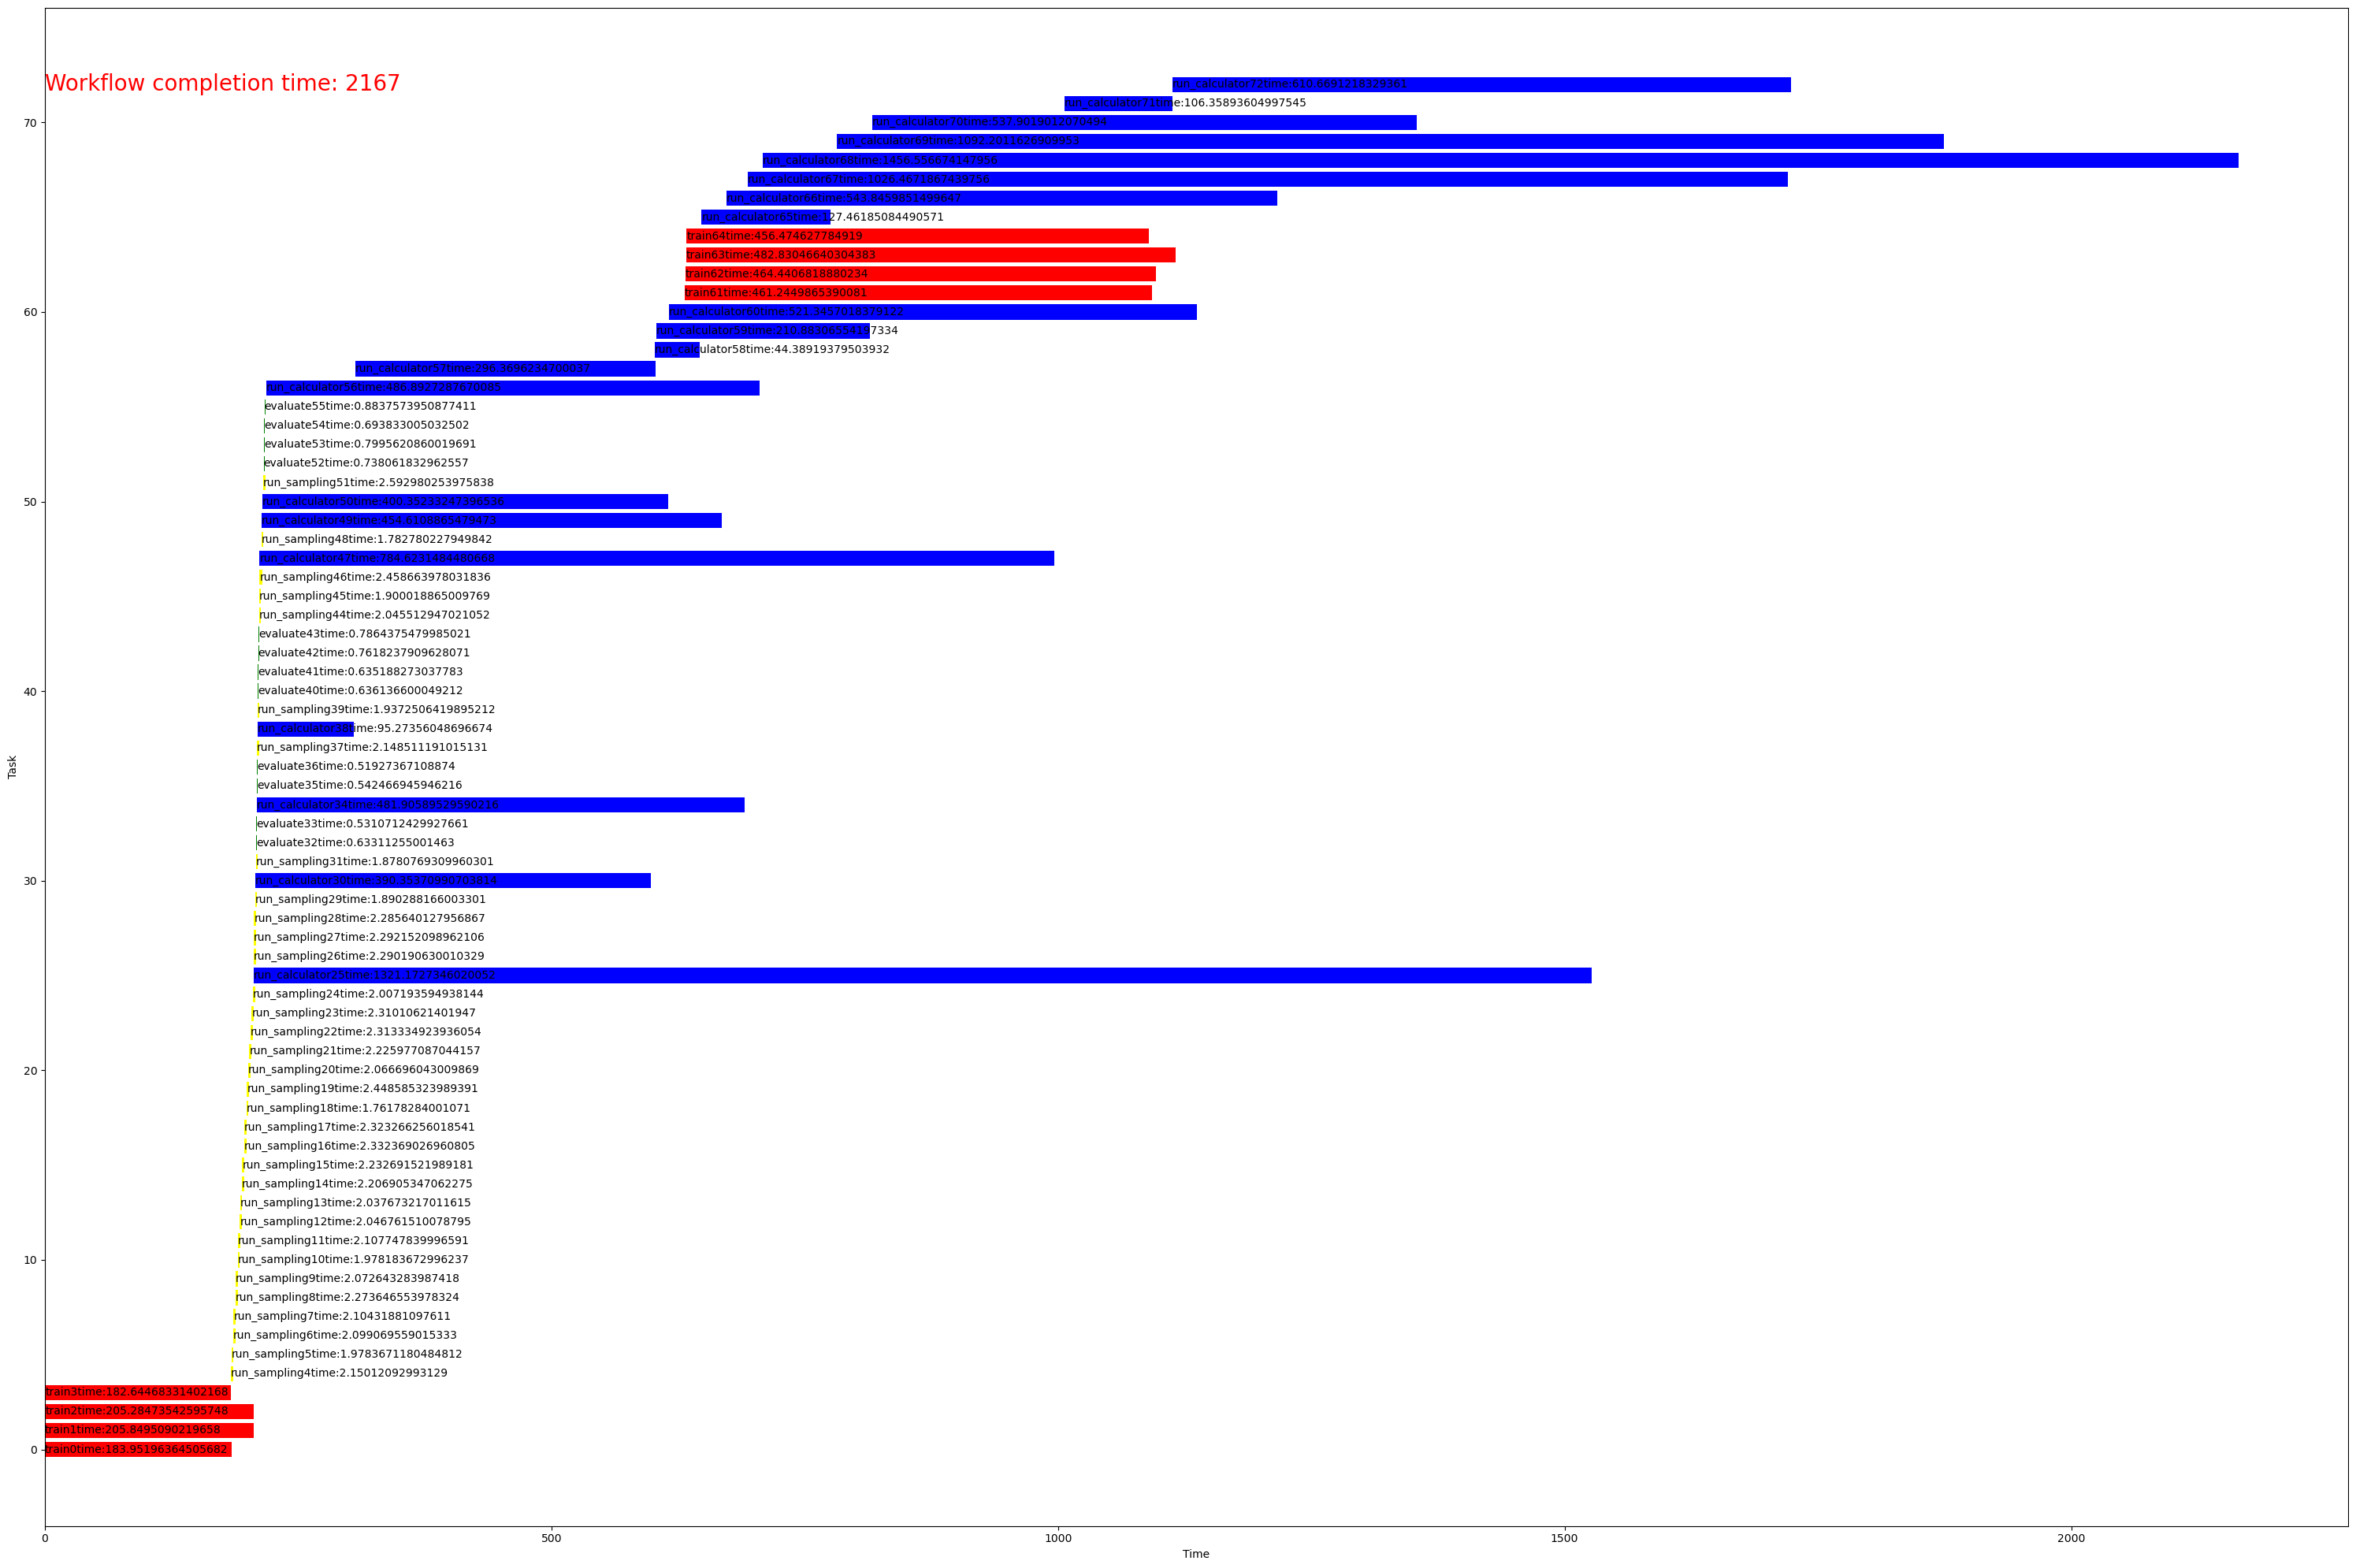

In [13]:
# fine-tuning surrogates, neww parameters, 8 threads
task_type = ['sampling-results', 'training-results', 'simulation-results', 'inference-results']
task_color = {'run_calculator': 'blue', 'train': 'red', 'run_sampling': 'yellow', 'evaluate': 'green'}
results = load_results(test2_1, task_type=task_type)
time_line_graph(results=results, task_color=task_color)

train: 1695286883.156341: 186.79636343405582
train: 1695286883.282726: 183.89907864900306
train: 1695286883.287668: 213.81825742602814
train: 1695286883.623223: 211.84734689304605
run_sampling: 1695287067.640351: 2.147360316012054
run_sampling: 1695287069.825319: 2.307219527079723
run_sampling: 1695287070.173999: 2.048660284024663
run_sampling: 1695287072.168705: 2.077754224999807
run_sampling: 1695287072.265172: 2.300262514036149
run_sampling: 1695287074.282889: 2.017923771985806
run_sampling: 1695287074.605046: 2.089737616013735
run_sampling: 1695287076.335872: 2.14647325198166
run_sampling: 1695287076.733438: 2.234669381054118
run_sampling: 1695287078.517389: 2.198153408942744
run_sampling: 1695287079.002134: 2.375348008936271
run_sampling: 1695287080.752499: 2.19111310201697
run_sampling: 1695287081.414197: 2.325870816013775
run_sampling: 1695287082.978717: 2.35473531705793
run_sampling: 1695287083.775077: 2.131232602987438
run_sampling: 1695287085.369688: 2.35625416599214
run_samp

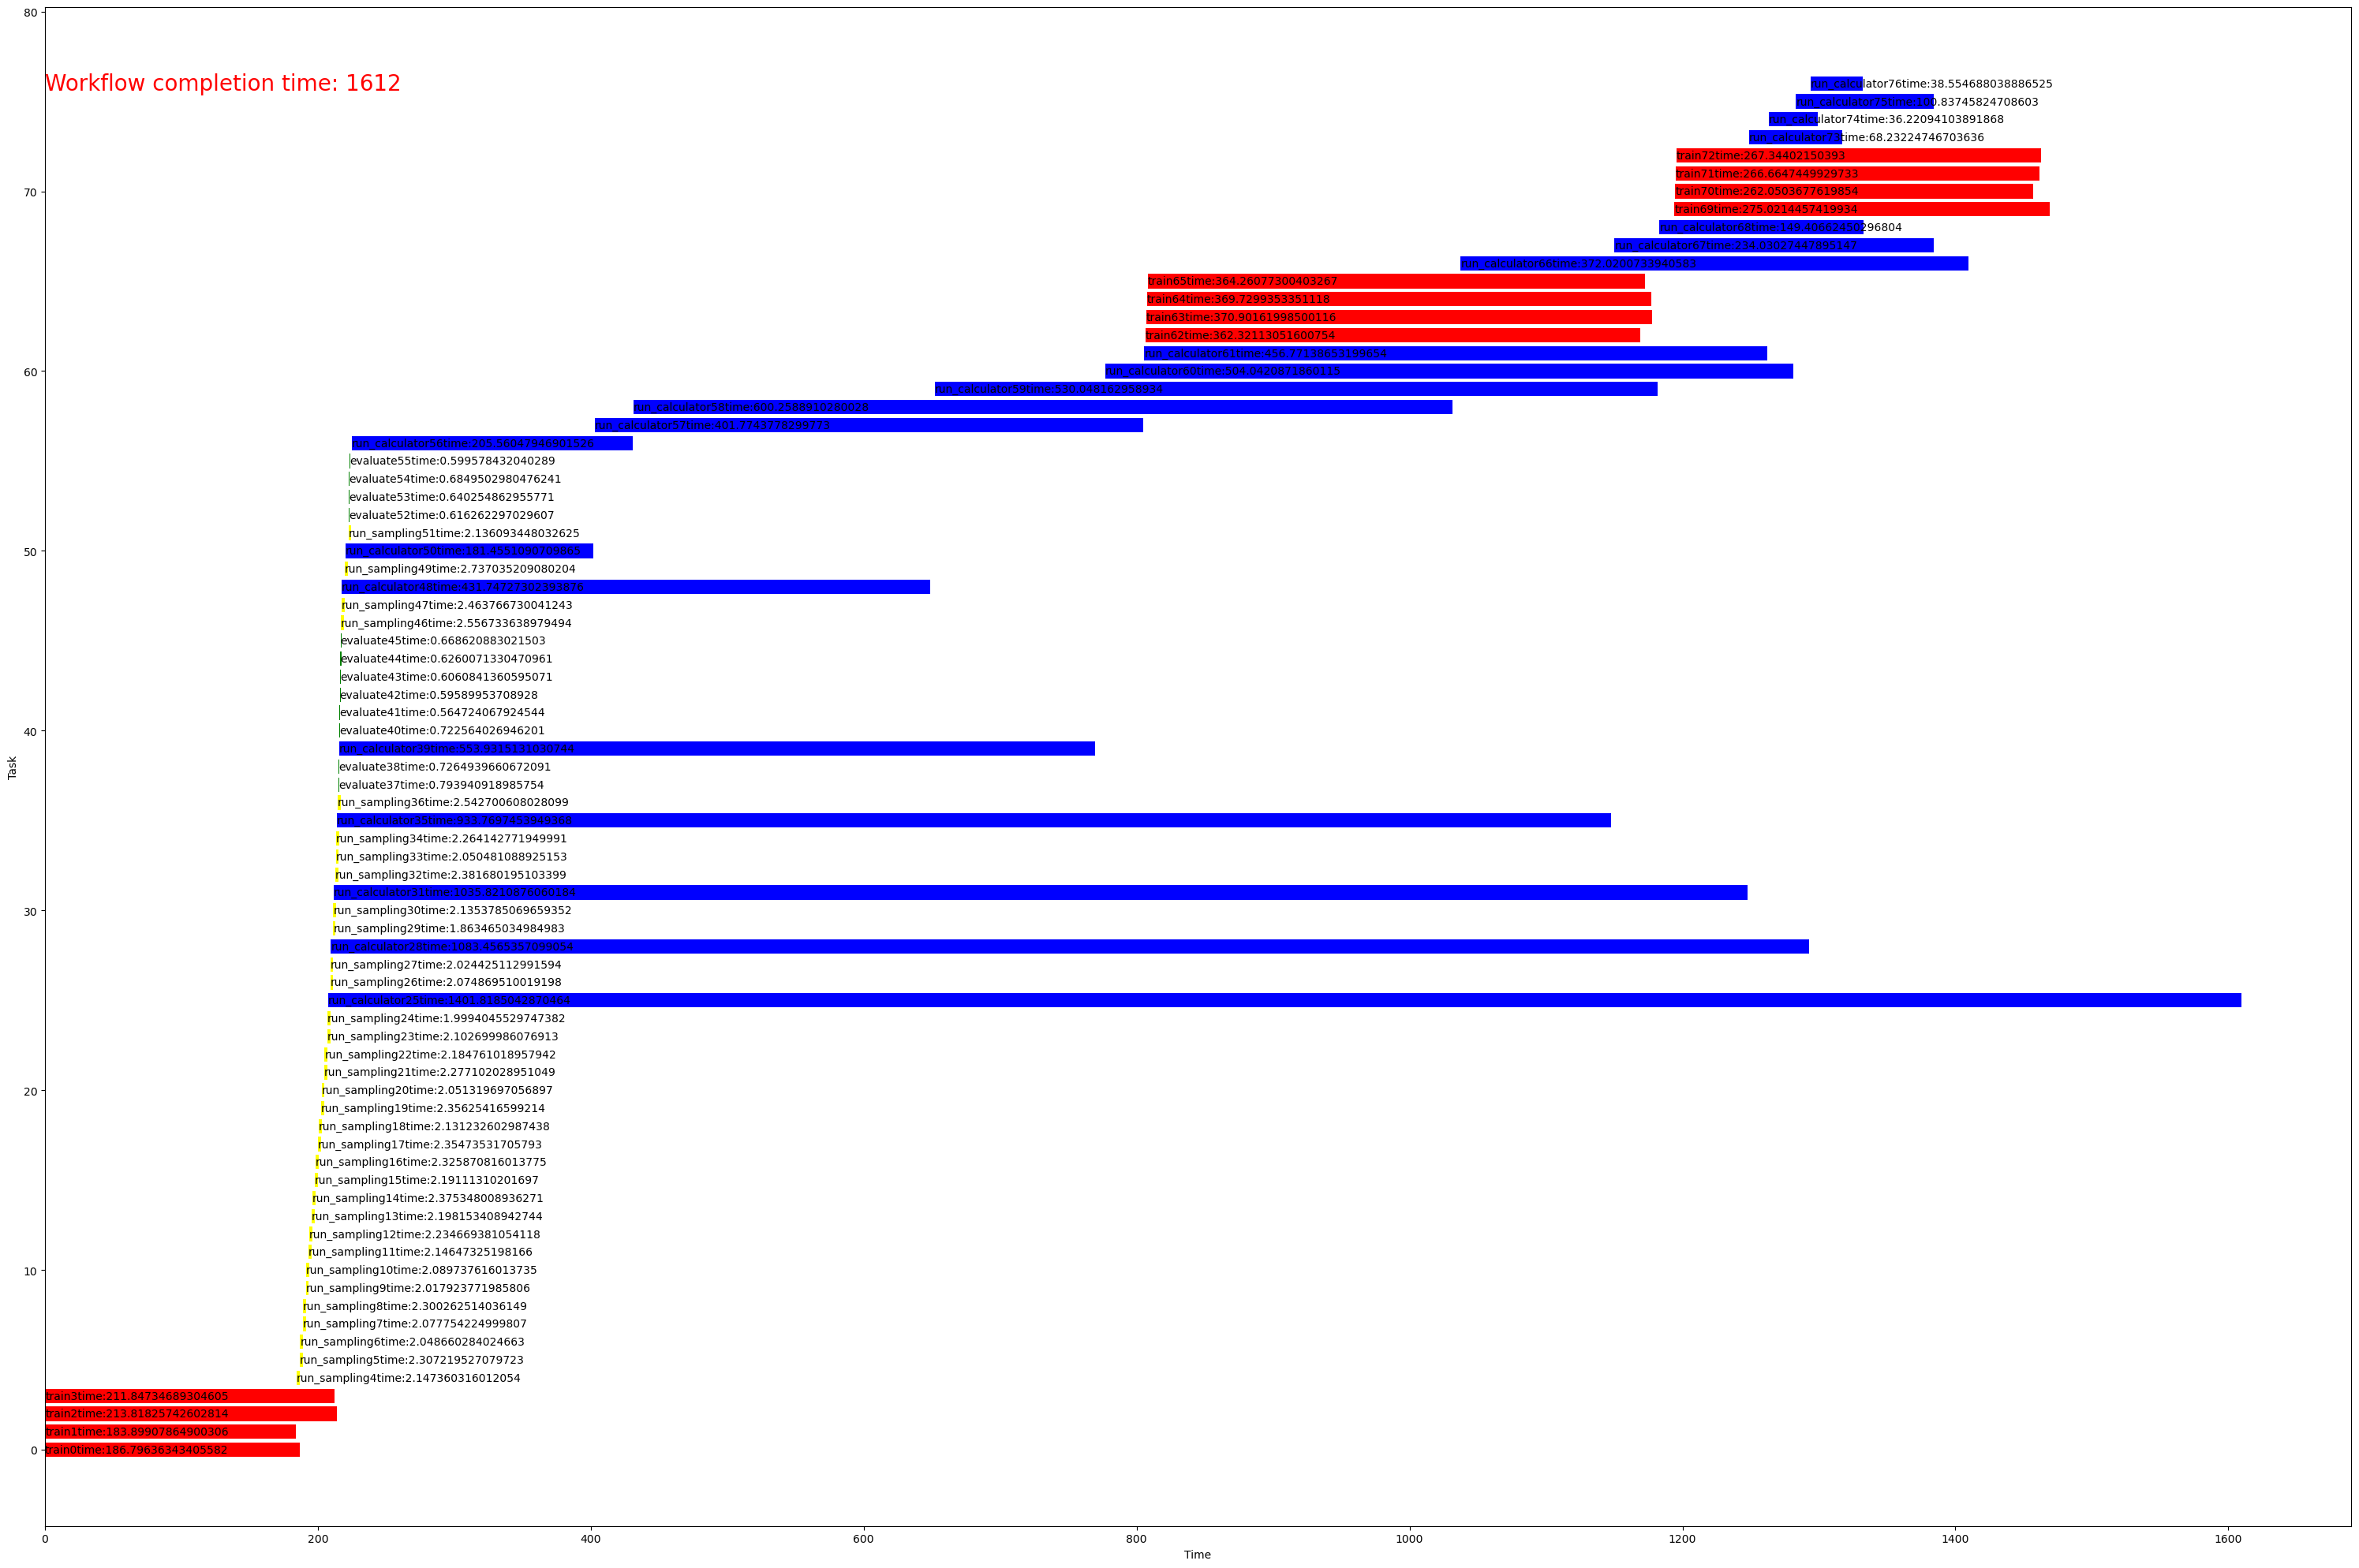

In [14]:
# fine-tuning surrogates, 8 threads long task first
task_type = ['sampling-results', 'training-results', 'simulation-results', 'inference-results']
task_color = {'run_calculator': 'blue', 'train': 'red', 'run_sampling': 'yellow', 'evaluate': 'green'}
results = load_results(test2_3, task_type=task_type)
time_line_graph(results=results, task_color=task_color)

train: 1695301061.799491: 210.54516411898658
train: 1695301061.931067: 209.49525007908233
train: 1695301062.054369: 188.79920869902708
train: 1695301062.31689: 191.38512938504573
run_sampling: 1695301251.277069: 2.389298182912171
run_sampling: 1695301253.703307: 2.434164007077925
run_sampling: 1695301253.932651: 2.44536516291555
run_sampling: 1695301256.17559: 2.426032184972428
run_sampling: 1695301256.417385: 2.087927478016354
run_sampling: 1695301258.539353: 2.494763441034592
run_sampling: 1695301258.637292: 2.346631063963286
run_sampling: 1695301261.026066: 2.29425071796868
run_sampling: 1695301261.072763: 2.261110663996078
run_sampling: 1695301263.354266: 2.170864513027481
run_sampling: 1695301263.370483: 2.340708063915372
run_sampling: 1695301265.563074: 2.131225312012247
run_sampling: 1695301265.743877: 2.559235331020318
run_sampling: 1695301267.729544: 2.162072882987559
run_sampling: 1695301268.342355: 2.324891826021485
run_sampling: 1695301269.92611: 2.3718228338984773
run_samp

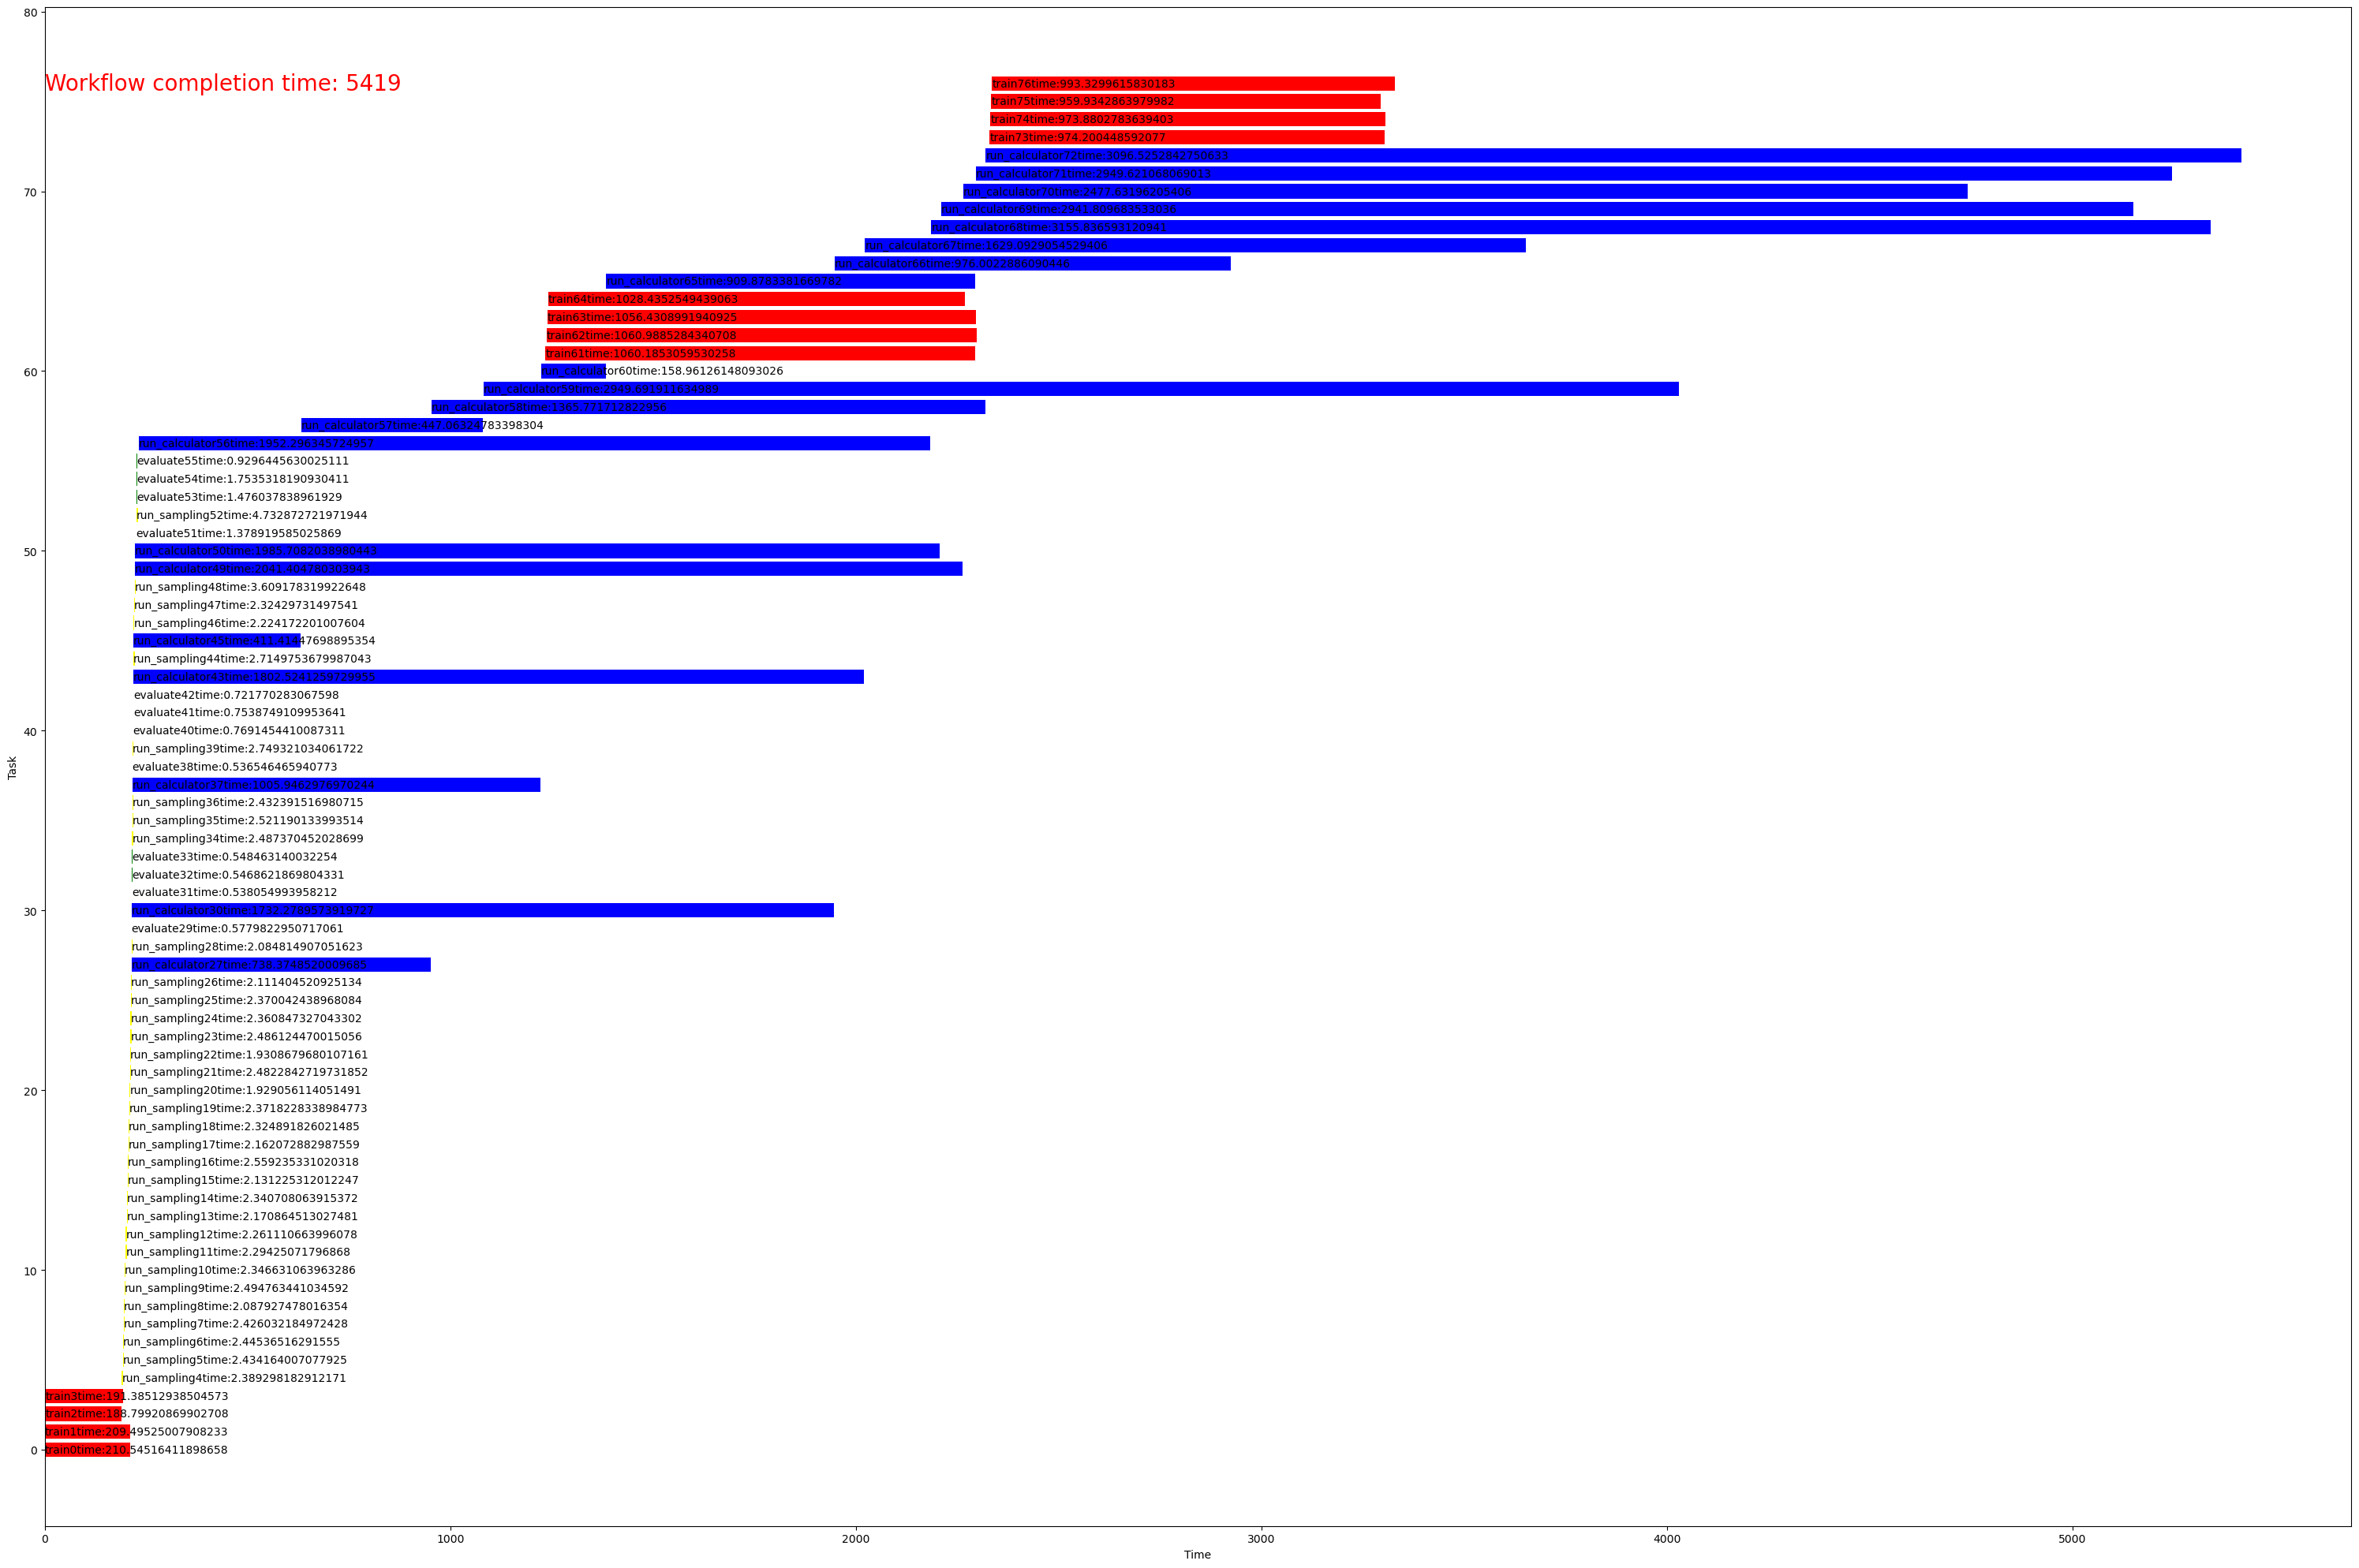

In [16]:
# fine-tuning surrogates, max threads same task sequence
task_type = ['sampling-results', 'training-results', 'simulation-results', 'inference-results']
task_color = {'run_calculator': 'blue', 'train': 'red', 'run_sampling': 'yellow', 'evaluate': 'green'}
results = load_results(test2_4, task_type=task_type)
time_line_graph(results=results, task_color=task_color)

train: 1695317033.039868: 203.97622971294913
train: 1695317038.779726: 216.72433301794808
train: 1695317237.314978: 193.3133847770514
train: 1695317255.812097: 215.13160630699713
train: 1695317430.873443: 193.18726241693366
train: 1695317471.172543: 215.33719617989846
train: 1695317624.325839: 193.71541156689636
train: 1695317686.742549: 216.15135566401295
train: 1695317818.439274: 193.4016561070457
train: 1695317903.247266: 217.04603499697987
train: 1695318012.086956: 193.1097647389397
train: 1695318120.524529: 222.30588455393445
run_sampling: 1695318205.621228: 2.297955497051589
run_sampling: 1695318207.965336: 2.385389739996753
run_sampling: 1695318210.384153: 2.405164605006575
run_sampling: 1695318212.833842: 2.170121086994186
run_sampling: 1695318215.056178: 2.200164691894315
run_sampling: 1695318217.306242: 2.178955828072503
run_sampling: 1695318219.532187: 2.323995407088659
run_sampling: 1695318221.895194: 2.160416991915554
run_sampling: 1695318224.10381: 2.202117194072343
run_s

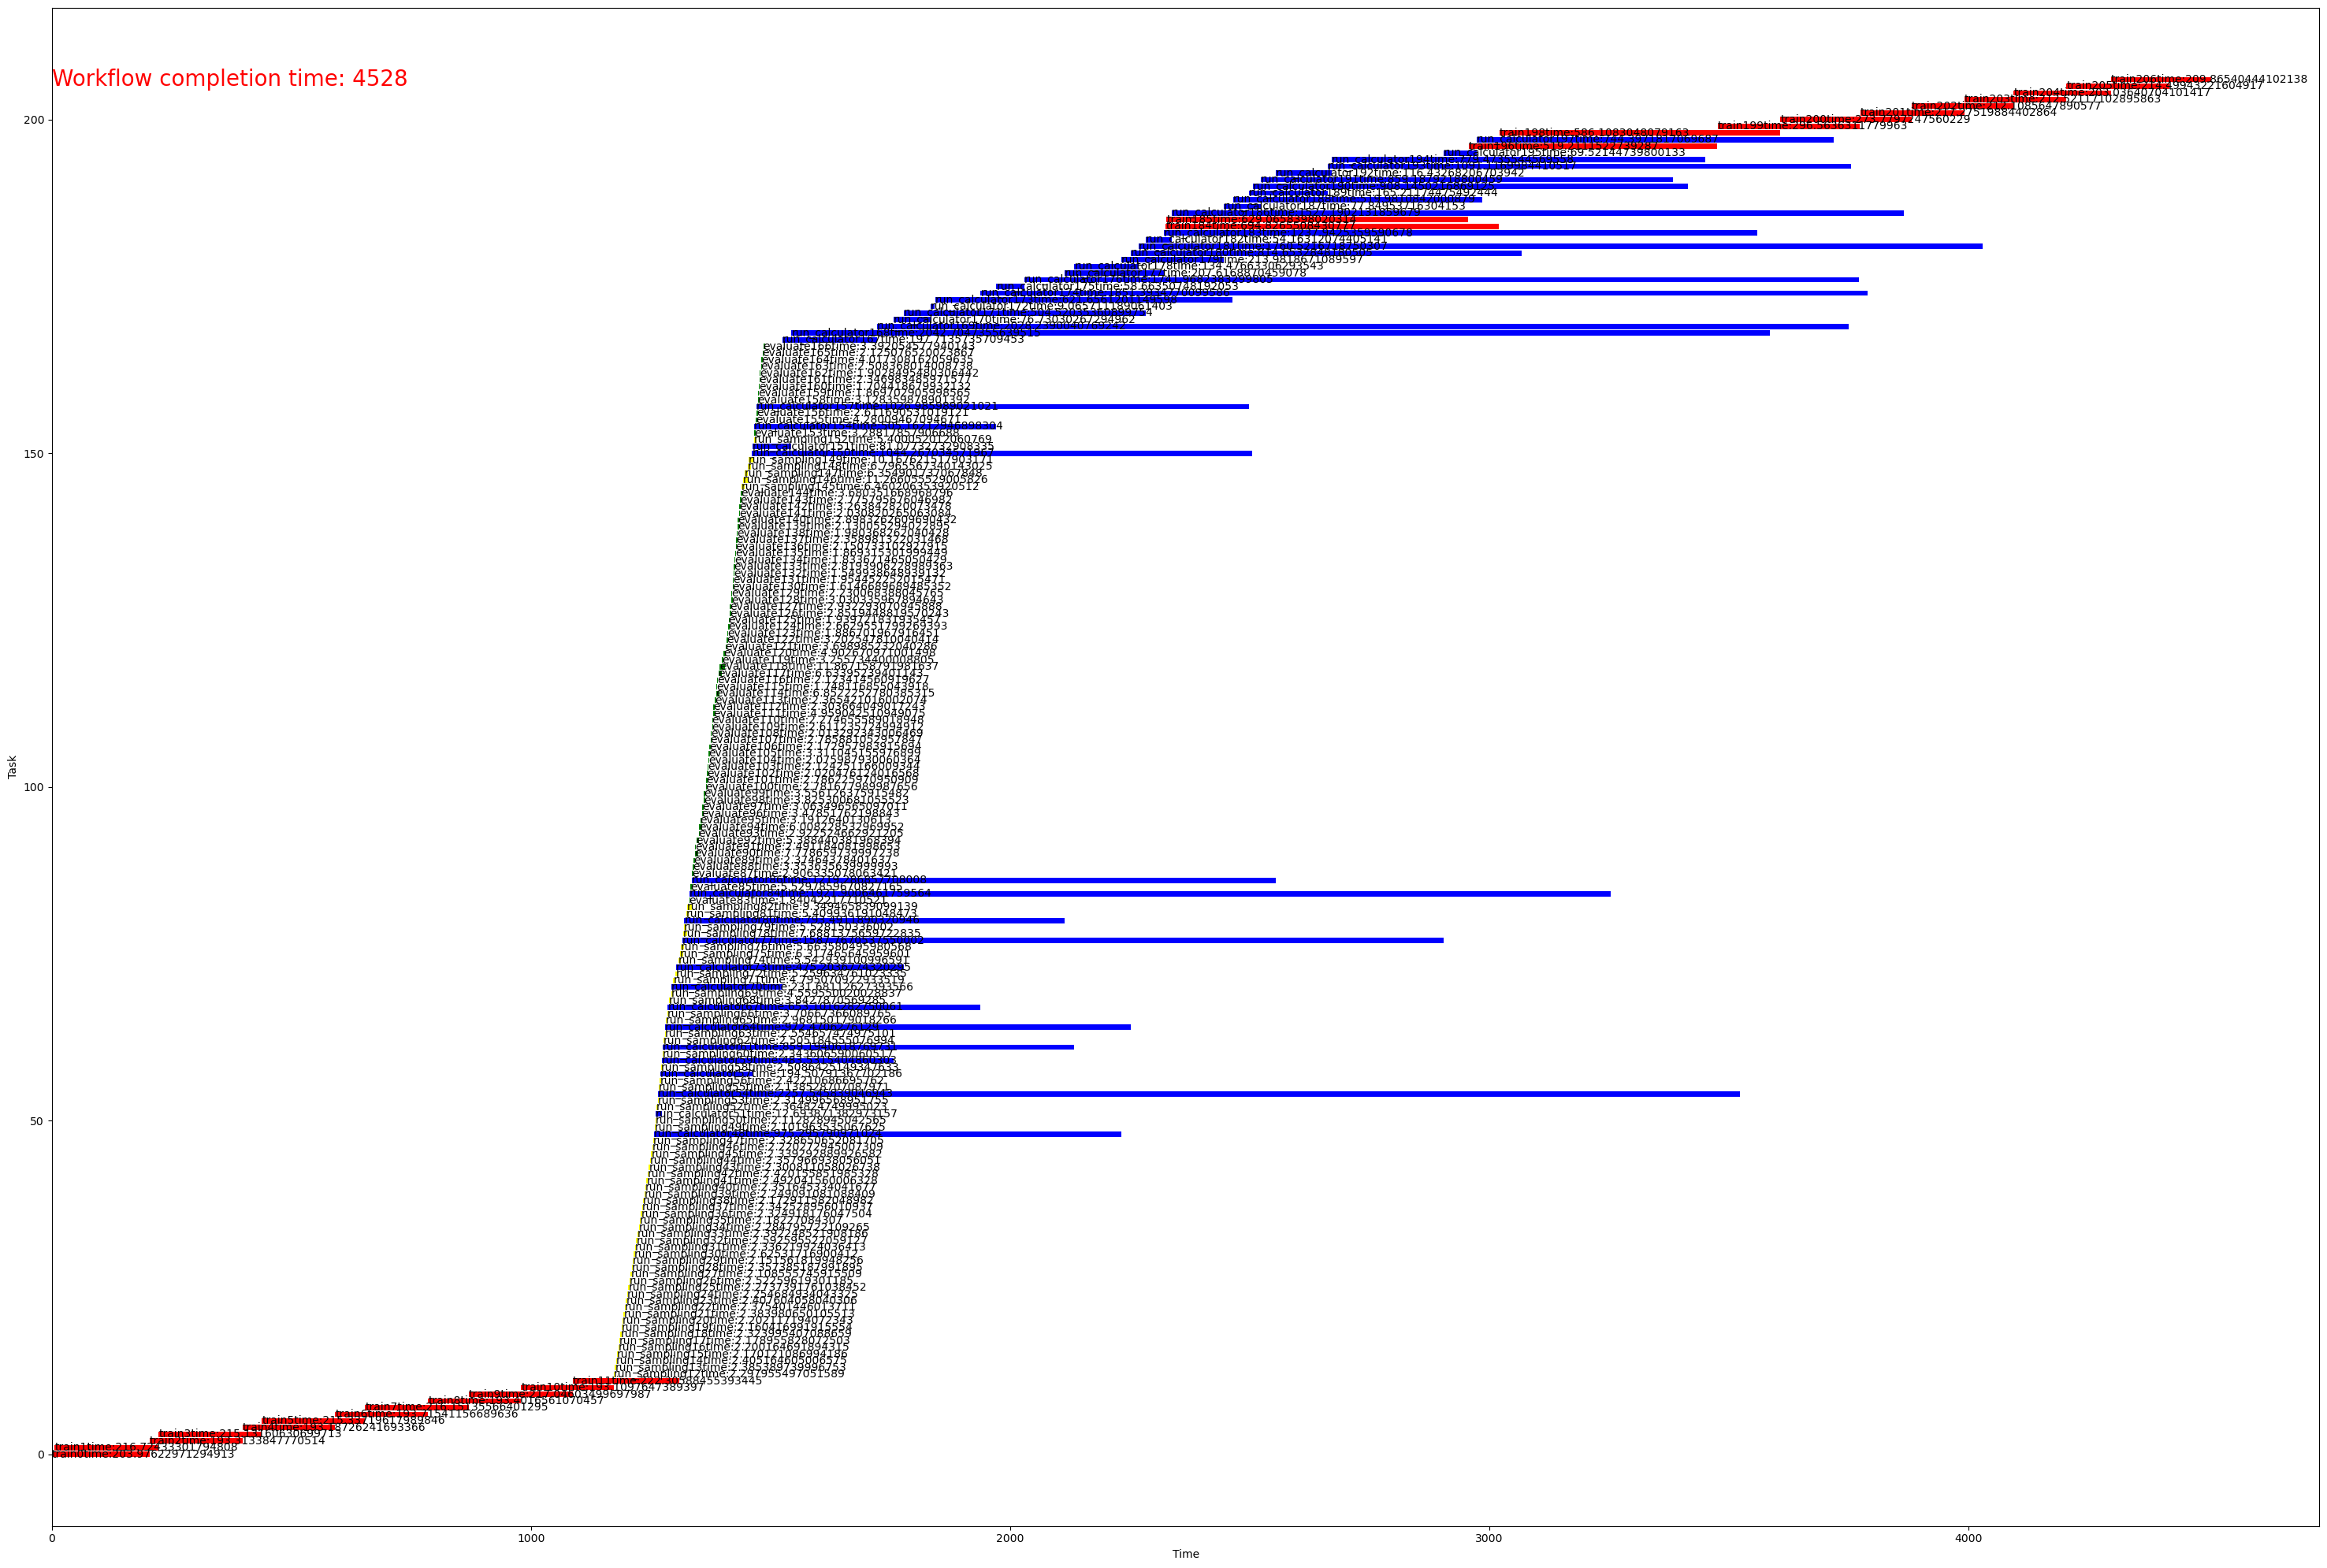

In [18]:
# fine-tuning surrogates, max threads same task sequence
task_type = ['sampling-results', 'training-results', 'simulation-results', 'inference-results']
task_color = {'run_calculator': 'blue', 'train': 'red', 'run_sampling': 'yellow', 'evaluate': 'green'}
results = load_results(test3, task_type=task_type)
time_line_graph(results=results, task_color=task_color)

In [7]:
### task on nodes and gpu
row_count = len(results)
print(row_count)

81
